This is a dev notebook of a solver for matter effect.

In [3]:
%matplotlib inline
%load_ext snakeviz

In [4]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import matplotlib.pylab as plt

In [103]:
import neuosc as no

### Expectations

Before any calculation, I have calculated the results using Mathematica. The system to be solved is

$$
i \partial_x 
$$

The parameters used before are (in units of $\mathrm{MeV}$ or $\mathrm{MeV}^2$):

$\theta_v = \theta_{13} = 0.153077$

$\delta m^2 = \delta m_{13}^2 = 2.6*10^{-15}$

$\omega_v=6.5*10^{-17}$

$\lambda_0 = 0.5 \lambda_{MSW} = 3.09888*10^{-17}$

$\omega_m = 3.66619*10^{-17}$

$\theta_m = 0.162129$

$k_1= 1; k_2 = 1/90$

$\{A_1,A_2\} = \{0.00003588645221954444, 0.06486364865874367\}$ in units of omegam


Using these parameters,

1. Only one frequency case the oscillation weavelength is of the order $\hat x = \omega_m x\sim 1000000$
2. IF we are going to see the FULL oscillation, we expect a calculation range of $\hat x \sim 10^8$.

In [5]:
# Parameters are shared by ALL methods in this notebook

endpoint = 10000; # integration range
dx = 10.0; # step size
lam0 = 0.845258; # in unit of omegam, omegam = 3.66619*10^-17
dellam = np.array([0.00003588645221954444, 0.06486364865874367]); # deltalambda/omegam
ks = [1.0,1.0/90]; # two k's
thm = 0.16212913985547778; # theta_m

savestep = 1;

# ZVODE METHOD

In [6]:
psi0, x0 = [1.0+0.j, 0.0], 0


xlin = np.arange(dx,endpoint+1*dx, dx)

psi = np.zeros([len(xlin)  , 2], dtype='complex_')

xlinsave = np.zeros(len(xlin)/savestep);
psisave = np.zeros([len(xlinsave)  , 2], dtype='complex_')


def hamiltonian(x, deltalambda, k, thetam):
    
#    return (-0.5 + 0.5 * deltalambda * np.sin(k*x) * np.cos(2*thetam) ) * no.pauli_matrices(3) - 0.5 * deltalambda * np.sin(k*x) * np.sin(2*thetam) * no.pauli_matrices(1)     # This hamiltonian is not working
#    return [[ 0,   0.5* np.sin(2*thetam) * deltalambda * np.sin(k*x) * np.exp( 1.0j * ( - x - np.cos(2*thetam) * (deltalambda * np.cos(k*x) / k)  ) )     ],   [ 0.5* np.sin(2*thetam) * deltalambda * np.sin(k*x) * np.exp( -1.0j * ( - x - np.cos(2*thetam) * ( deltalambda /k * np.cos(k*x) )  ) ), 0 ]]   # this is the Hamiltonian that I used in MMA exactly  
    return [[ 0,   0.5* np.sin(2*thetam) * ( deltalambda[0] * np.sin(k[0]*x) + deltalambda[1] * np.sin(k[1]*x) ) * np.exp( 1.0j * ( - x - np.cos(2*thetam) * (  ( deltalambda[0]/k[0] * np.cos(k[0]*x) + deltalambda[1]/k[1] * np.cos(k[1]*x) ) )  ) )     ],   [ 0.5* np.sin(2*thetam) * ( deltalambda[0] * np.sin(k[0]*x) + deltalambda[1] * np.sin(k[1]*x) ) * np.exp( -1.0j * ( - x - np.cos(2*thetam) * ( deltalambda[0] /k[0] * np.cos(k[0]*x) + deltalambda[1] /k[1] * np.cos(k[1]*x) )  ) ), 0 ]]   # Hamiltonian for double frequency

def deripsi(t, psi, deltalambda, k , thetam):
    
    return -1.0j * np.dot( hamiltonian(t, deltalambda,k,thetam), [psi[0], psi[1]] )

def jacob(t, psi, deltalambda, k, thetam):
    
    return -1.0j * hamiltonian(t, deltalambda,k,thetam)




In [7]:
# print hamiltonian(1,dellam[0], ks[0], thm), deripsi(1, np.array([1,1]), dellam[0], ks[0],thm)
print hamiltonian(1,dellam, ks, thm)#, deripsi(1, np.array([1,1]), dellam[0], ks[0],thm)

print len(psi), len(xlin), xlin[0], xlin[-1], psi[-1]

[[0, (0.00011590025694108917-2.9594208223761961e-05j)], [(0.00011590025694108917+2.9594208223761961e-05j), 0]]
1000 1000 10.0 10000.0 [ 0.+0.j  0.+0.j]


In [8]:
# hamiltonian(1000,dellam[0], ks[0], thm) - np.conj( np.transpose( hamiltonian(1000,dellam[0], ks[0], thm)  )  )
hamiltonian(1000,dellam, ks, thm) - np.conj( np.transpose( hamiltonian(1000,dellam, ks, thm)  )  )

array([[ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j]])

In [9]:
# Compare Hamiltonian 12 element with Mathematica

##########################

# mmahamil12x = np.loadtxt("assets/matter-perturbatin-solver/reconstructHamilsListx.csv", dtype=float)
# mmahamil12 = np.transpose( np.genfromtxt("assets/matter-perturbatin-solver/reconstructHamilsList.csv", delimiter=",")  )


# pyhamil12 = np.empty_like(mmahamil12x)

# pyhamil12 = map(lambda x: hamiltonian(x,dellam, ks, thm)[0][1], mmahamil12x)

# filtertmp=1000;

# # print np.real(pyhamil12)
    
# plt.figure(figsize=(18,13))

# plt.plot(mmahamil12x[:filtertmp],mmahamil12[0][:filtertmp],'-',color='black',label='Mathematica Real')
# plt.plot(mmahamil12x[:filtertmp],np.real(pyhamil12)[:filtertmp],'--',color='red',label='Python Real')
# plt.title('Real Part of $H_{12}$',fontsize=20)
# plt.xlabel('$\hat x$',fontsize=20)
# plt.ylabel('$\mathrm{Re}(H_{12})$',fontsize=20)
# plt.legend()
# plt.show()

# plt.figure(figsize=(18,13))
# plt.plot(mmahamil12x[:filtertmp],mmahamil12[1][:filtertmp],'-',color='black',label='Mathematica Imaginary')
# plt.plot(mmahamil12x[:filtertmp],np.imag(pyhamil12)[:filtertmp],'--',color='red',label='Python Imaginary')
# plt.title('Imaginary Part of $H_{12}$',fontsize=20)
# plt.xlabel('$\hat x$',fontsize=20)
# plt.ylabel('$\mathrm{Im}(H_{12})$',fontsize=20)
# plt.legend()
# plt.show()


In [10]:
## Complex System

#sol = ode(deripsi,jacob).set_integrator('zvode', method='bdf', with_jacobian=True)
#sol.set_initial_value(psi0, x0).set_f_params(dellam[0],ks[0],thm).set_jac_params(dellam[0],ks[0],thm)

sol = ode(deripsi).set_integrator('zvode', method='bdf', atol=1e-8, with_jacobian=False)
sol.set_initial_value(psi0, x0).set_f_params(dellam,ks,thm)

flag = 0
flagsave = 0

while sol.successful() and sol.t < endpoint:
    sol.integrate(xlin[flag])
    if np.mod(flag,savestep)==0:
        psisave[flagsave] = sol.y
        xlinsave[flagsave] = sol.t
        flagsave = flagsave + 1
    flag = flag + 1
    #   print sol.t, sol.y


In [11]:
prob = np.absolute(psisave)**2

In [12]:
probtran = np.transpose(prob)

In [14]:
## To compare with the result from odeint

xlin_odeint = np.load('assets/odeint-range-10000-step-10.0-xlin.npy')
prob0_odeint = np.load('assets/odeint-range-10000-step-10.0-prob0.npy')
prob1_odeint = np.load('assets/odeint-range-10000-step-10.0-prob1.npy')

xlin_ode_dopri5 = np.load('assets/ode-dopri5-range-10000-step-10.0-xlin4.npy')
prob0_ode_dopri5 = np.load('assets/ode-dopri5-range-10000-step-10.0-prob0.npy')
prob1_ode_dopri5 = np.load('assets/ode-dopri5-range-10000-step-10.0-prob1.npy')

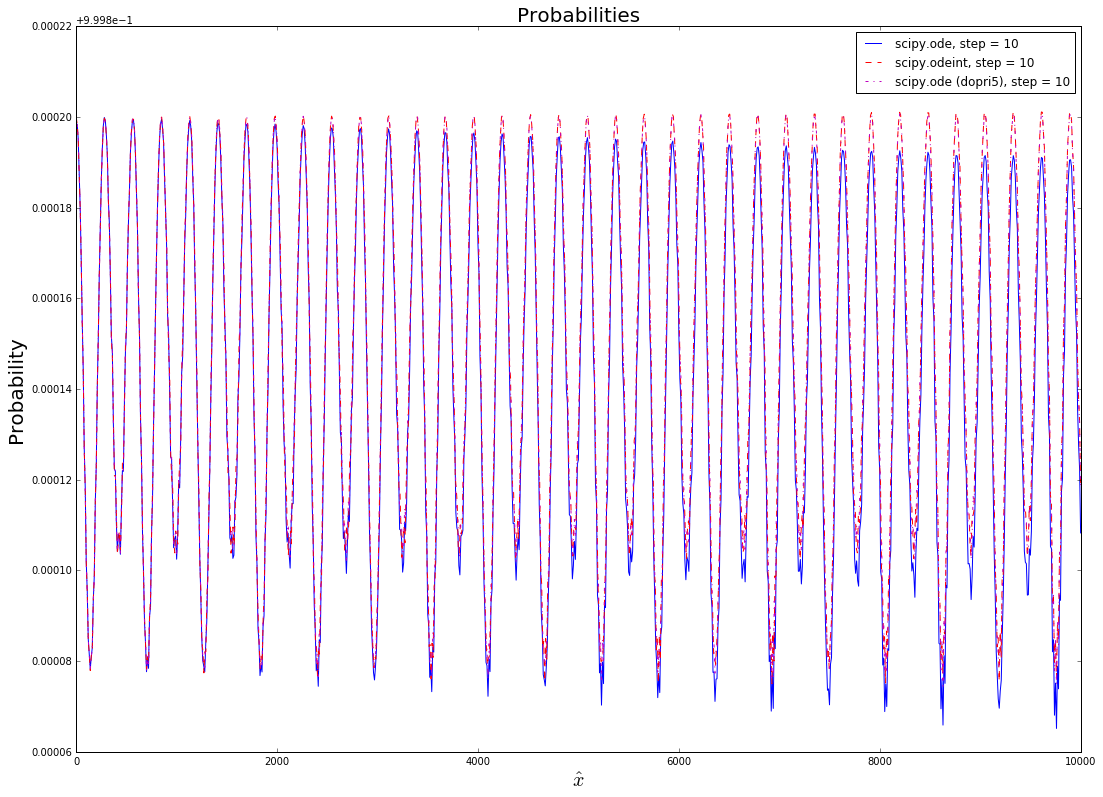

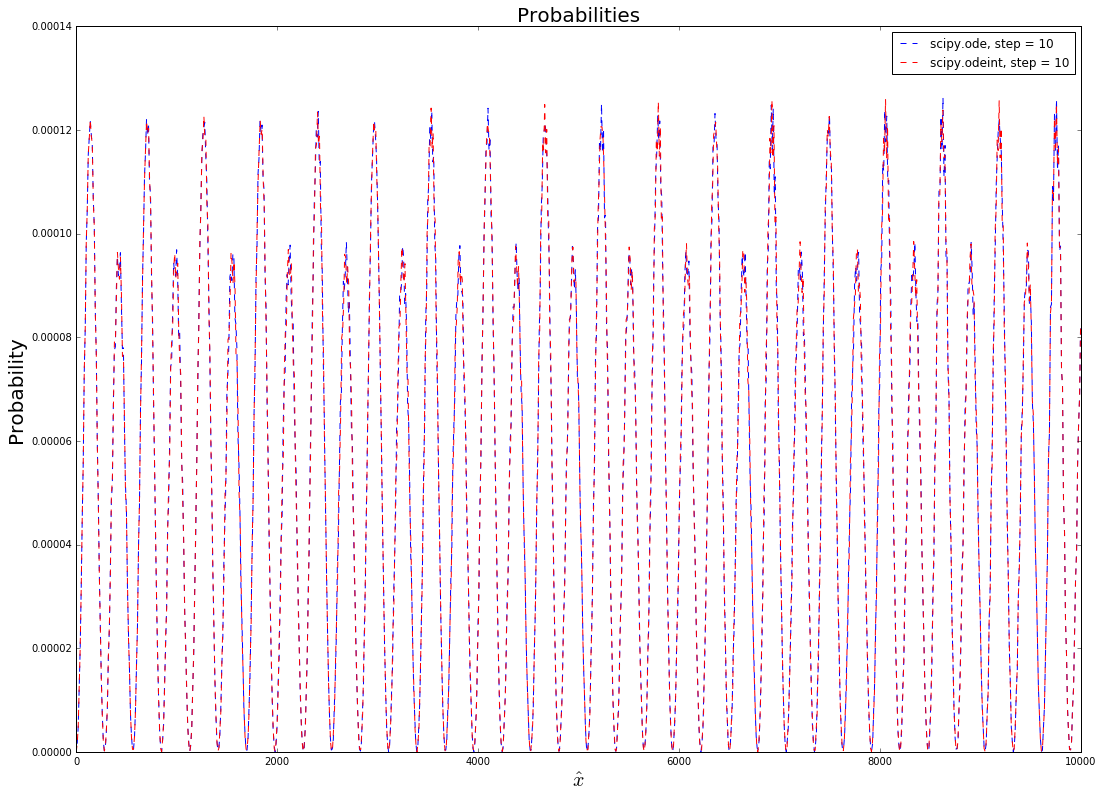

In [17]:
plt.figure(figsize=(18,13))

step_figure = 10

plt.plot(xlinsave, probtran[0],'b-',label="scipy.ode, step = "+str(step_figure))
plt.plot(xlin_odeint, prob0_odeint, 'r--',label="scipy.odeint, step = "+str(step_figure))
plt.plot(xlin_ode_dopri5, prob0_ode_dopri5, 'm-.',label="scipy.ode (dopri5), step = "+str(step_figure))
plt.title("Probabilities",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend()
plt.show()

plt.figure(figsize=(18,13))

plt.plot(xlinsave, probtran[1],'b--',label="scipy.ode, step = "+str(step_figure))
#plt.plot(xlin_odeint, prob1_odeint, 'r--', lw = 3, dashes=(5,10),label="scipy.odeint, step = "+str(step_figure))
plt.plot(xlin_odeint, prob1_odeint, 'r--', label="scipy.odeint, step = "+str(step_figure))
plt.title("Probabilities",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend()
plt.show()


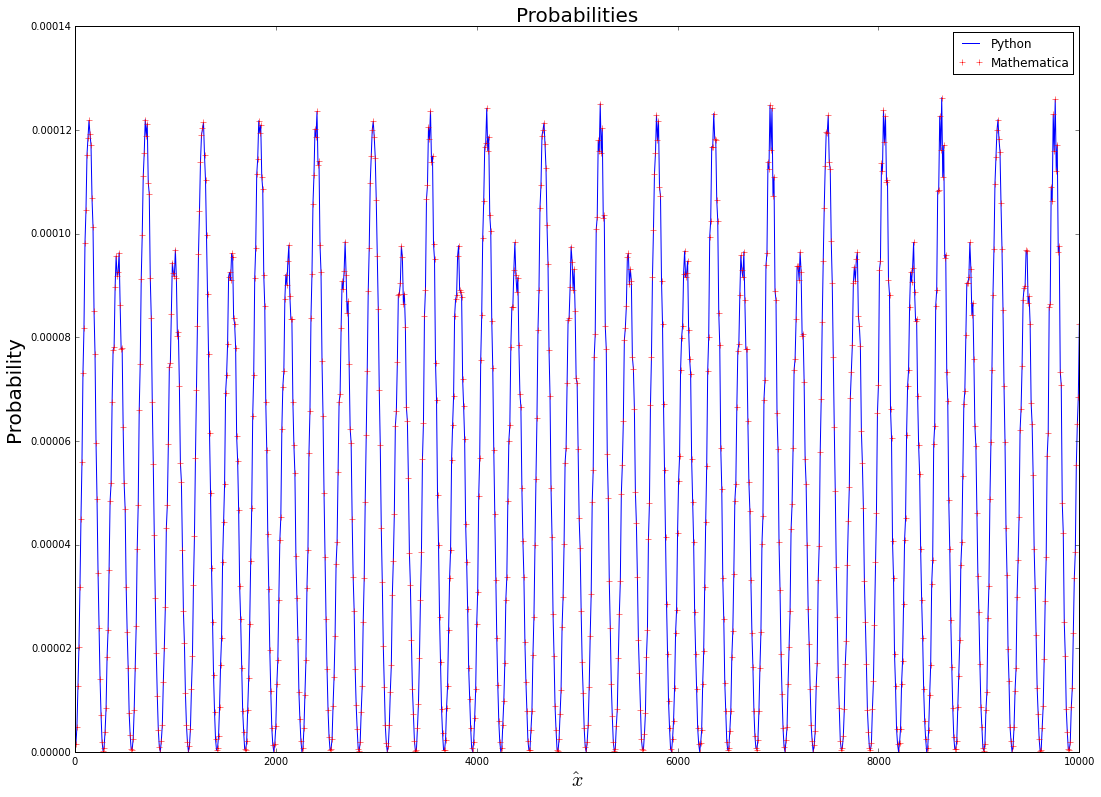

In [473]:
# Compare with Mathematica
mmaprob2fsx=np.loadtxt("assets/matter-perturbatin-solver/reconstructsingleProb22sListx.csv",dtype=float)
mmaprob2fs=np.loadtxt("assets/matter-perturbatin-solver/reconstructsingleProb22sList.csv",dtype=float)

plt.figure(figsize=(18,13))

plt.plot(xlin, probtran[1],'-',label="Python") 
plt.plot(mmaprob2fsx,mmaprob2fs,'r+',label="Mathematica") #
plt.title("Probabilities",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend()

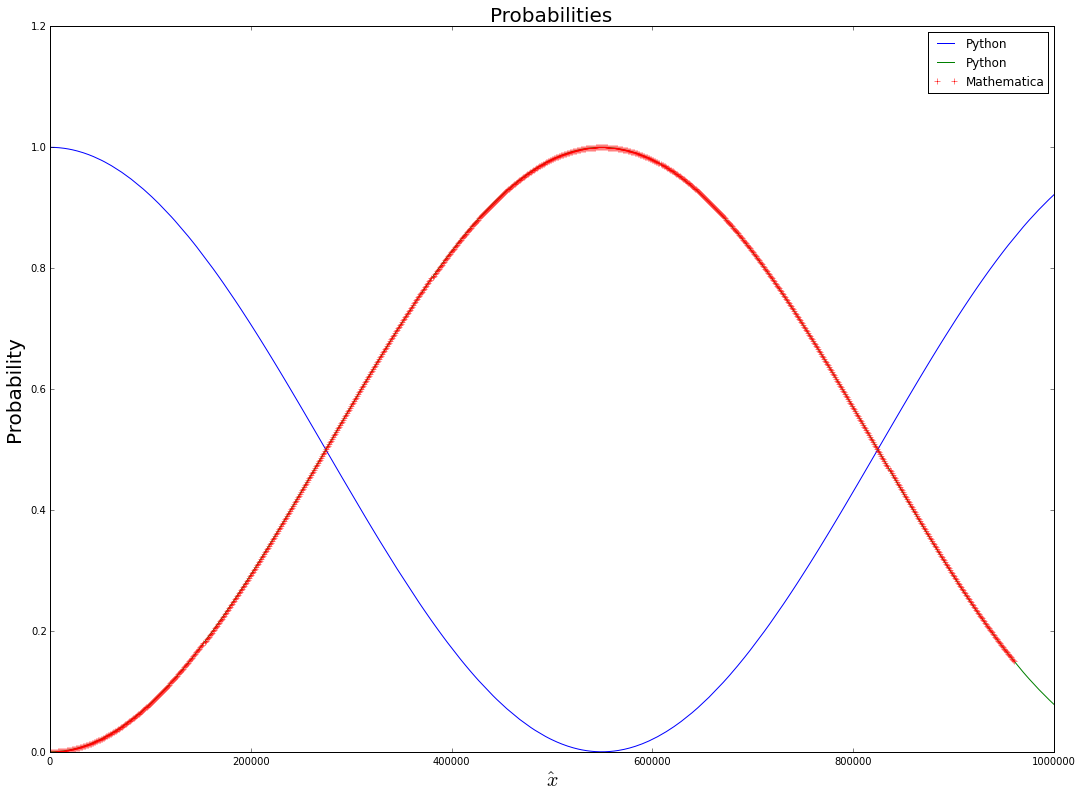

In [295]:
# Compare with Mathematica
mmaprobx=np.loadtxt("assets/matter-perturbatin-solver/reconstructsingleProb2Listx.csv",dtype=float)
mmaprob=np.loadtxt("assets/matter-perturbatin-solver/reconstructsingleProb2List.csv",dtype=float)

plt.figure(figsize=(18,13))

plt.plot(xlin, prob,'-',label="Python") #
plt.plot(mmaprobx,mmaprob,'r+',label="Mathematica") #
plt.title("Probabilities",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend()

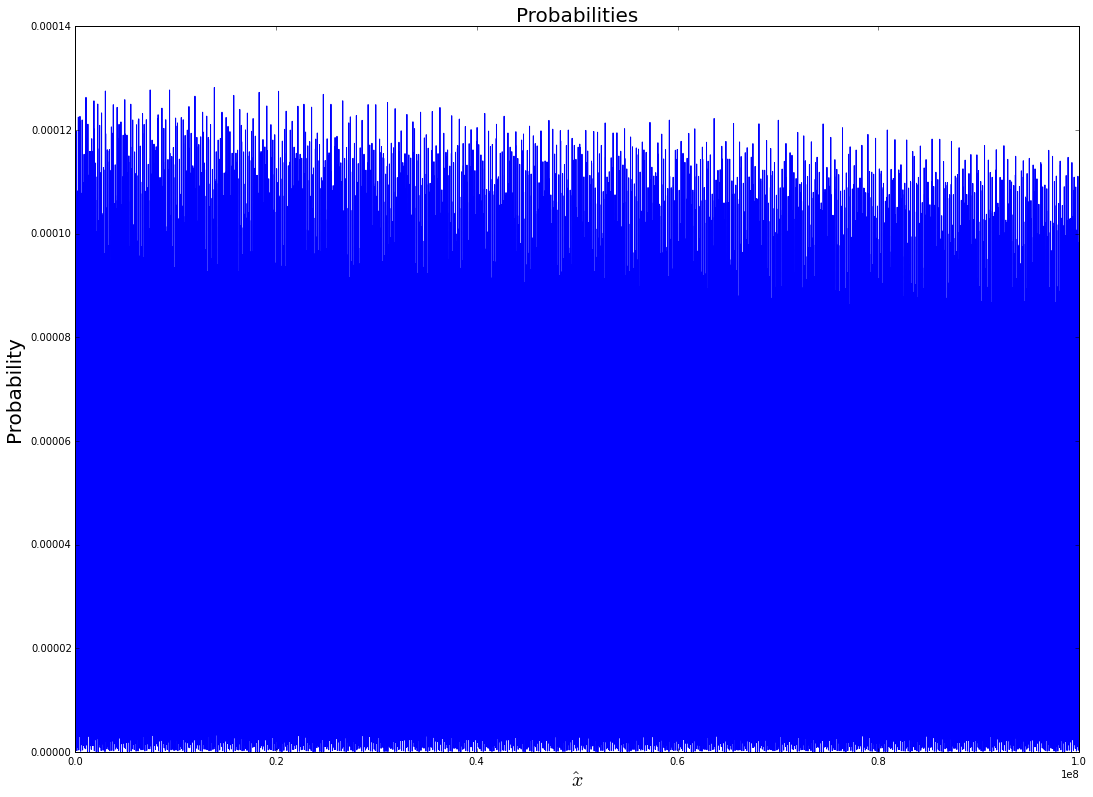

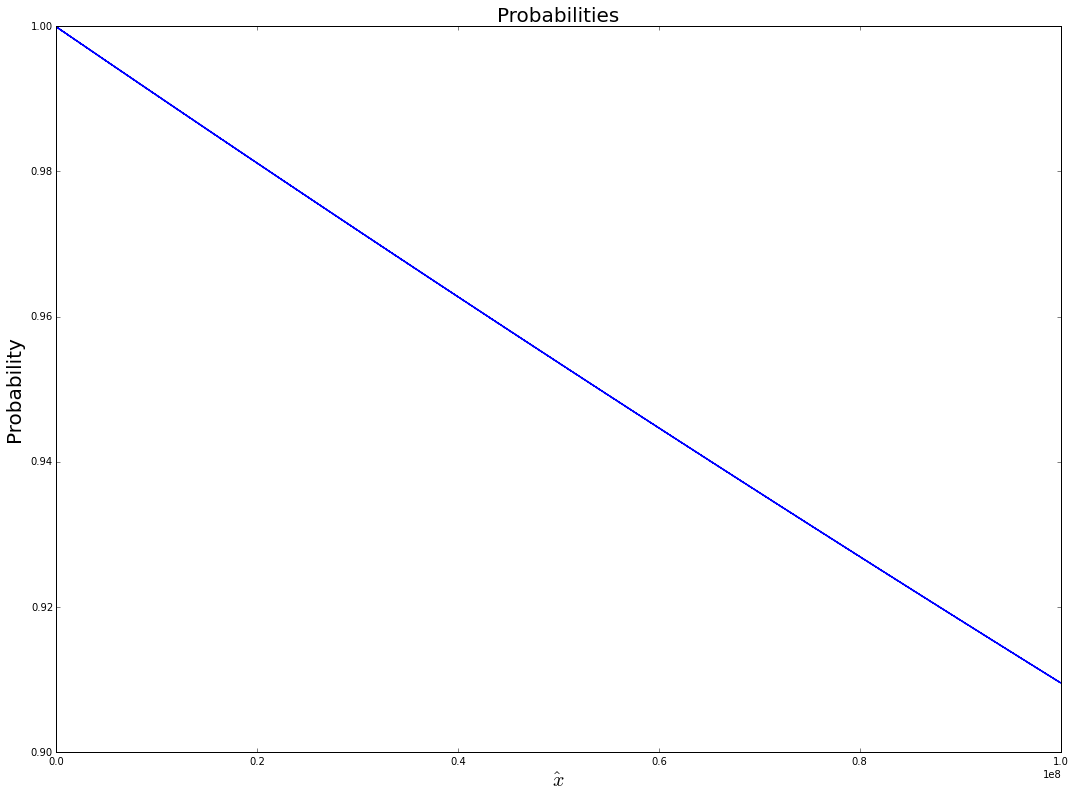

In [36]:
endpoint1e8 = 100000000;
dx1e8 = 10.0;

savestep1e8 = 1000;

xlinsave1e8 = xlinsave1e8 = np.arange(savestep1e8,endpoint1e8,savestep1e8*dx1e8)


probtran1e8=np.load("assets/matter-perturbatin-solver/probtran-1e8.npy")

plt.figure(figsize=(18,13))

fig_prob1e8 = plt.plot(xlinsave1e8, probtran1e8[1],'-')
plt.title("Probabilities",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.show()

plt.figure(figsize=(18,13))
fig_prob1e80 = plt.plot(xlinsave1e8, probtran1e8[0],'-')
plt.title("Probabilities",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.show()

In [29]:
print len(xlinsave1e8),len(probtran1e8[0])
print xlinsave1e8, probtran1e8[0]

10000 10000
[  0.00000000e+00   1.00000000e+03   2.00000000e+03 ...,   9.99700000e+06
   9.99800000e+06   9.99900000e+06] [ 0.99999843  0.99990273  0.99993056 ...,  0.90949929  0.90957159
  0.90949192]


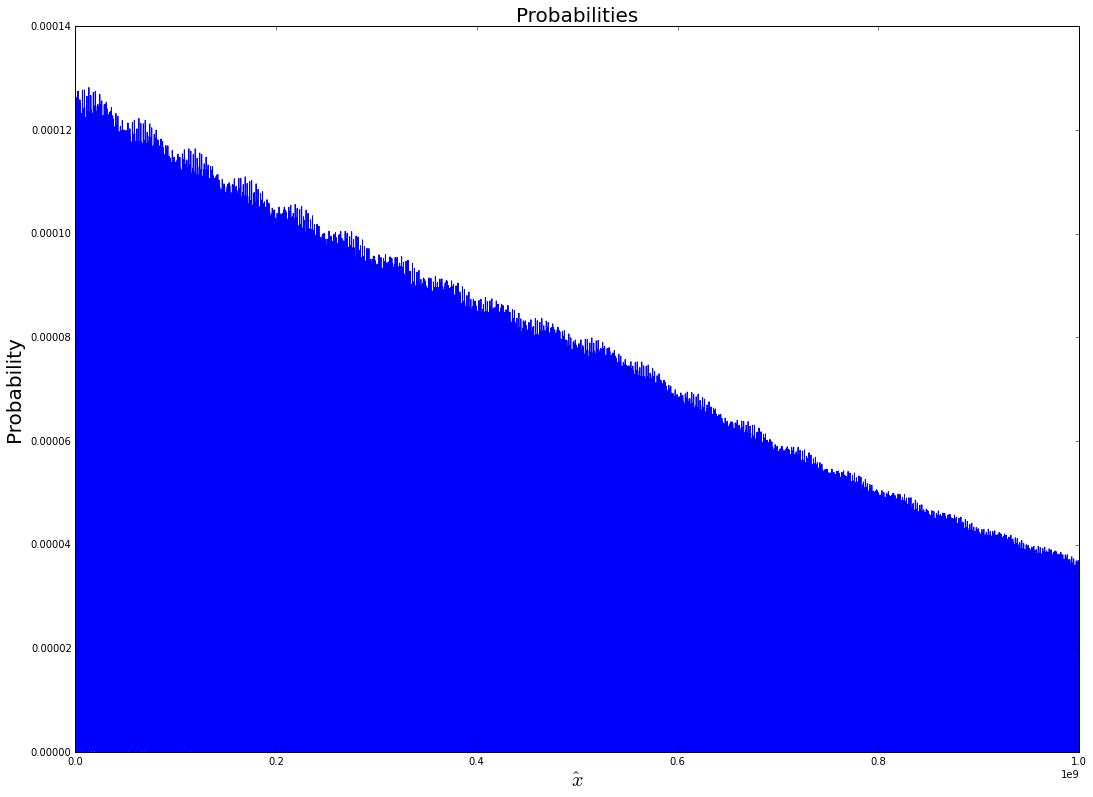

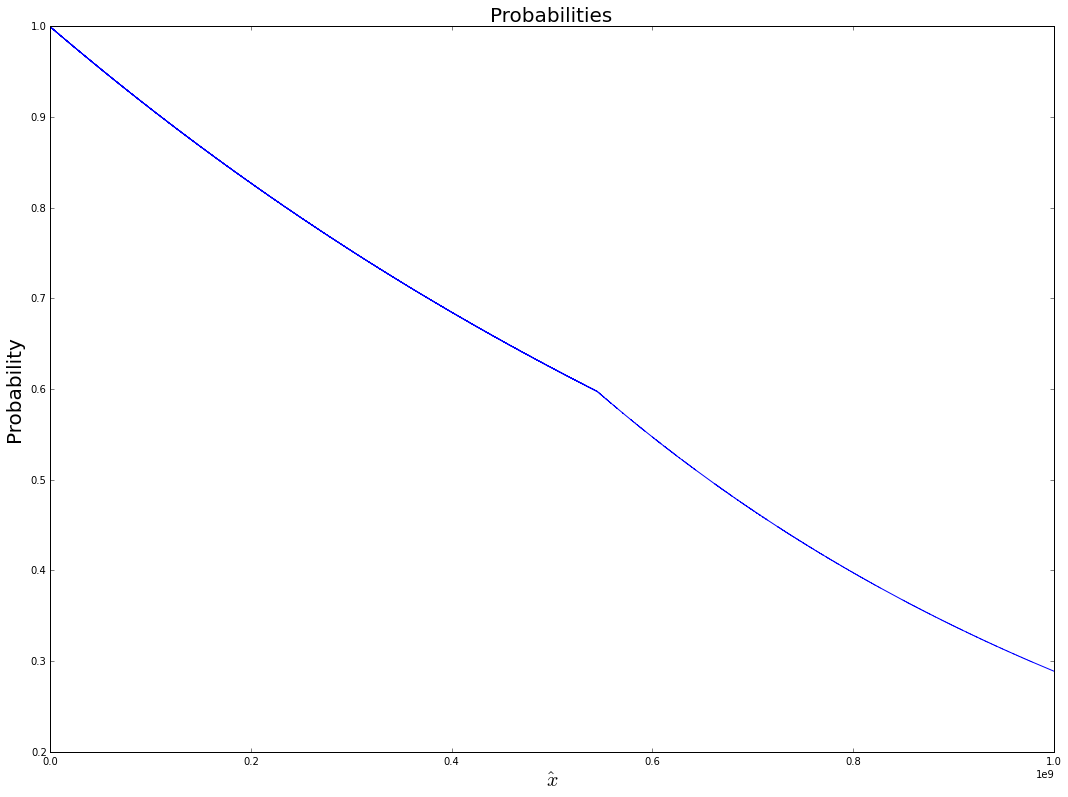

In [40]:
endpoint1e9 = 1000000000;
dx1e9 = 10.0;

savestep1e9 = 1000;

xlinsave1e9 = xlinsave1e9 = np.arange(savestep1e9,endpoint1e9,savestep1e9*dx1e9)


probtran1e9=np.load("assets/matter-perturbatin-solver/probtran-1e9.npy")

plt.figure(figsize=(18,13))

fig_prob1e9 = plt.plot(xlinsave1e9, probtran1e9[1],'-')
plt.title("Probabilities",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.show()

plt.figure(figsize=(18,13))
fig_prob1e90 = plt.plot(xlinsave1e9, probtran1e9[0],'-')
plt.title("Probabilities",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.show()